In [1]:
import pytorch_lightning as pl
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear as LitModel
from modules.experiments.dataset import (
    construct_synthetic_cabin_ir, synthetic_cabin_ir_dataset_root_path
)
from modules.utils.convention import get_saved_model_path
from modules.experiments.experiment import Experiment

pl.seed_everything(1234)

viewpoint = 'A_Pillar_Codriver'

constructed_loader = construct_synthetic_cabin_ir(
    dataset_root_path=synthetic_cabin_ir_dataset_root_path,
    viewpoint=viewpoint
)
saved_model_path = get_saved_model_path(
    model_name=LitModel.__name__,
    trained_dataset_name=constructed_loader['dataset_name'],
    trained_datasubset_name=constructed_loader['datasubset_name'],
)
experiment = Experiment(
    LitModel=LitModel,
    constructed_loader=constructed_loader,
    saved_model_path=saved_model_path,
    model_parameters=dict(
        exclude_ankle=True,
        exclude_knee=True
    )
)

experiment.setup()
experiment.train()

Global seed set to 1234
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


predicted
train_dataset 37499 val_dataset 6250 test_dataset 6251
train_dataset 37499 val_dataset 6250 test_dataset 6251


Missing logger folder: saved_lifter_2d_3d_model/LitSimpleBaselineLinear/synthetic_cabin_ir/A_Pillar_Codriver_predicted/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 2423.638343811035


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 2925 batches: 277.7899540183891
val MPJPE from: 6208 samples : 53.887829184532166


Validation: 0it [00:00, ?it/s]

check #2
training loss from 2925 batches: 65.7444140340528
val MPJPE from: 6208 samples : 33.51936116814613


Validation: 0it [00:00, ?it/s]

check #3
training loss from 2925 batches: 54.0747059843479
val MPJPE from: 6208 samples : 32.78566151857376


Validation: 0it [00:00, ?it/s]

check #4
training loss from 2925 batches: 50.459444376393265
val MPJPE from: 6208 samples : 33.361729234457016


Validation: 0it [00:00, ?it/s]

check #5
training loss from 2925 batches: 48.54350733833435
val MPJPE from: 6208 samples : 32.44515880942345


Validation: 0it [00:00, ?it/s]

check #6
training loss from 2925 batches: 46.71939779550601
val MPJPE from: 6208 samples : 33.73579680919647


Validation: 0it [00:00, ?it/s]

check #7
training loss from 2925 batches: 45.05468142083567
val MPJPE from: 6208 samples : 32.35899657011032


Validation: 0it [00:00, ?it/s]

check #8
training loss from 2925 batches: 43.897432107955986
val MPJPE from: 6208 samples : 33.097315579652786


Validation: 0it [00:00, ?it/s]

check #9
training loss from 2925 batches: 42.80789968677056
val MPJPE from: 6208 samples : 31.655430793762207


Validation: 0it [00:00, ?it/s]

check #10
training loss from 2925 batches: 42.044075023160026
val MPJPE from: 6208 samples : 32.202497124671936


Validation: 0it [00:00, ?it/s]

check #11
training loss from 2925 batches: 41.51636726708494
val MPJPE from: 6208 samples : 32.619185745716095


Validation: 0it [00:00, ?it/s]

check #12
training loss from 2925 batches: 40.91226870687599
val MPJPE from: 6208 samples : 32.43332356214523


Validation: 0it [00:00, ?it/s]

check #13
training loss from 2925 batches: 40.40018220742544
val MPJPE from: 6208 samples : 32.681334763765335


Validation: 0it [00:00, ?it/s]

check #14
training loss from 2925 batches: 40.00920211148058
val MPJPE from: 6208 samples : 32.58459270000458


In [2]:
experiment.test()
experiment.print_result()

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/LitSimpleBaselineLinear/synthetic_cabin_ir/A_Pillar_Codriver_predicted/lightning_logs/version_0/checkpoints/epoch=44-step=26325.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/LitSimpleBaselineLinear/synthetic_cabin_ir/A_Pillar_Codriver_predicted/lightning_logs/version_0/checkpoints/epoch=44-step=26325.ckpt


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │    36.022864282131195     │
└───────────────────────────┴───────────────────────────┘

MPJPE = 36.022864282131195
PJPE =
                     PJPE
nose            23.056990
left_eye        23.126945
right_eye       22.301165
left_ear        22.796535
right_ear       17.950804
left_shoulder    9.667561
right_shoulder   9.632454
left_elbow      77.204933
right_elbow     83.247452
left_wrist      51.212479
right_wrist     50.516586
left_hip        39.712311
right_hip       37.871227


## Train Samples

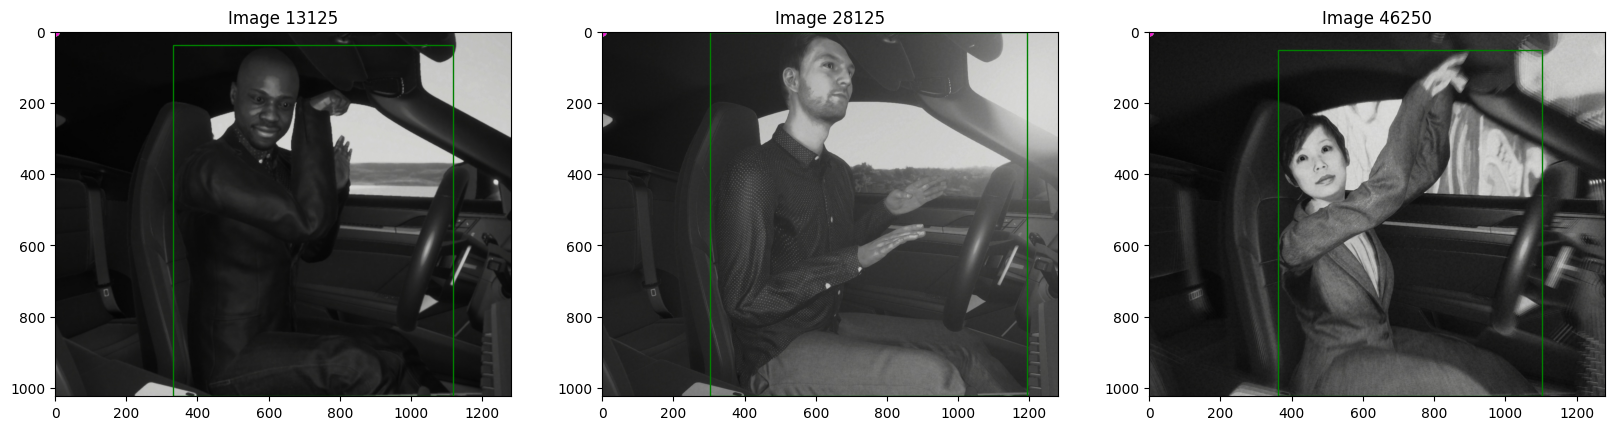

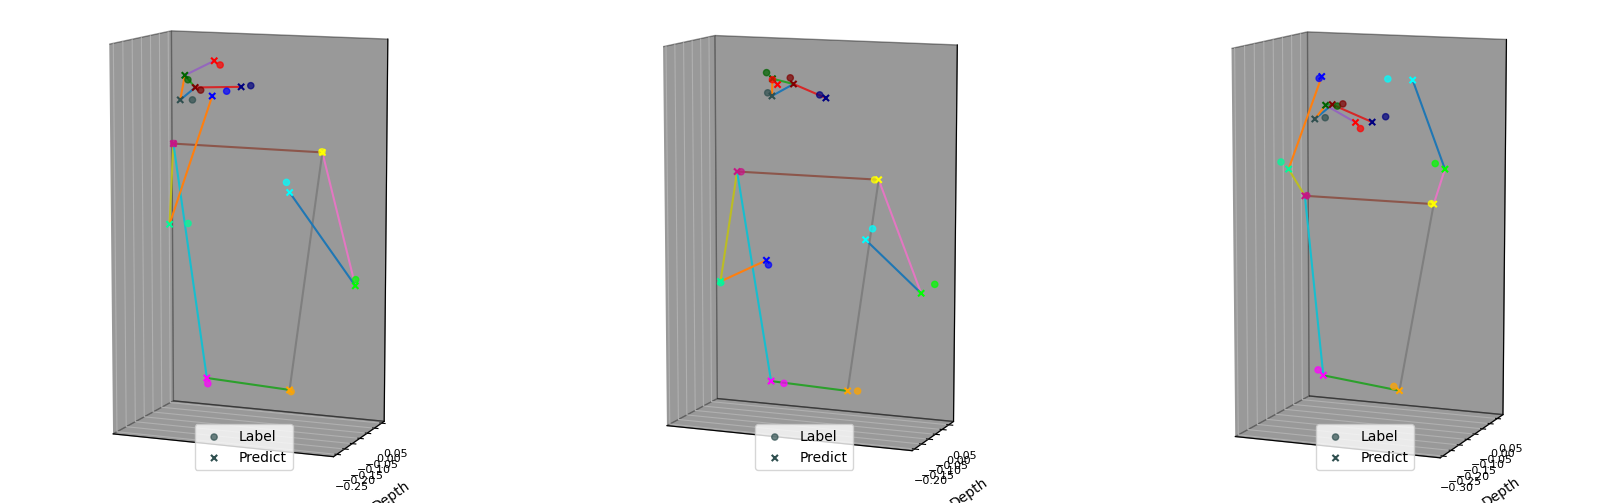

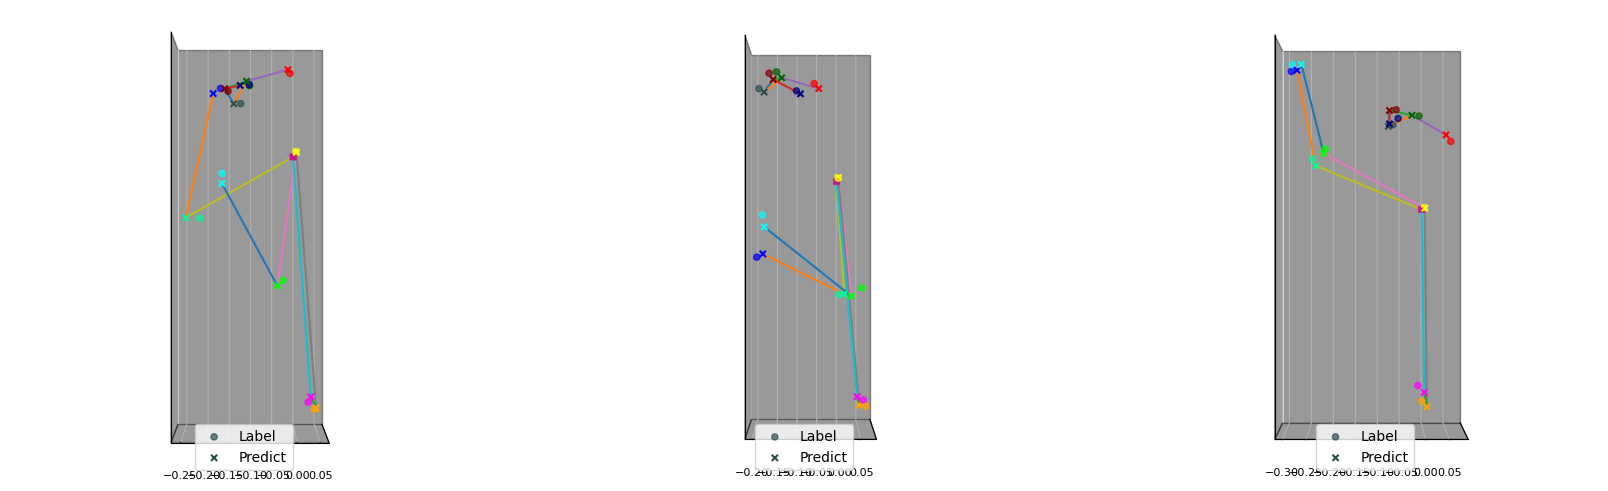

In [3]:
from modules.utils.visualization import (
    plot_samples
)
from pathlib import Path

dataset_length = len(experiment.train_loader.dataset)
plot_samples(
    Path(synthetic_cabin_ir_dataset_root_path)/ viewpoint,
    experiment.lit_model,
    experiment.train_loader,
    'train',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[
        int(dataset_length * 0.1),
        int(dataset_length * 0.5),
        int(dataset_length * 0.9),
    ],
    is_plot_gt_skeleton=False
)

## Test Samples

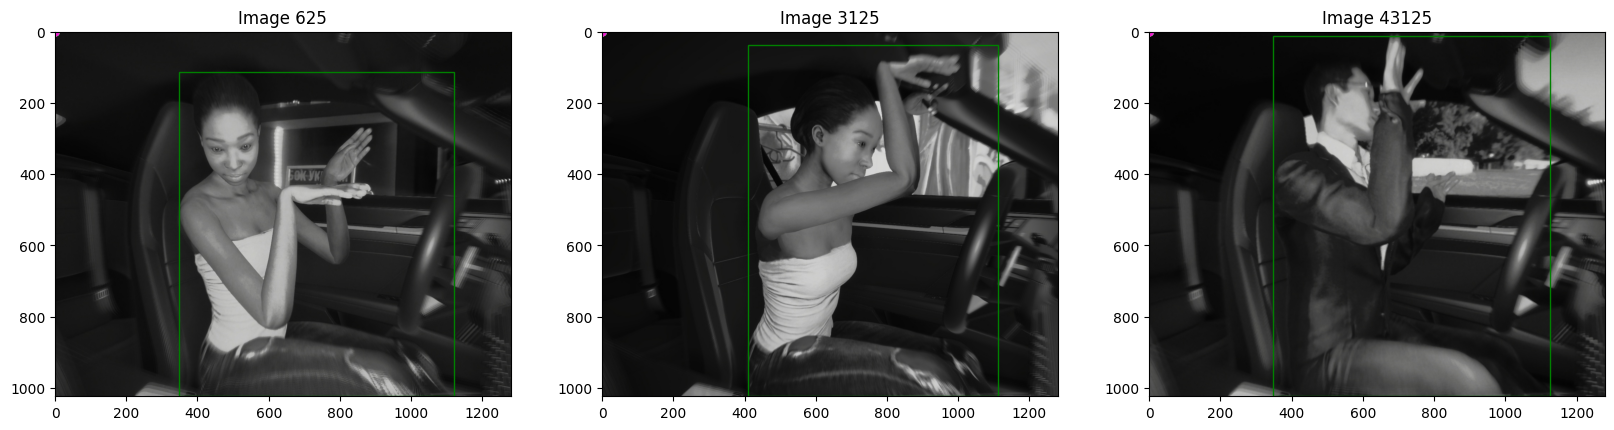

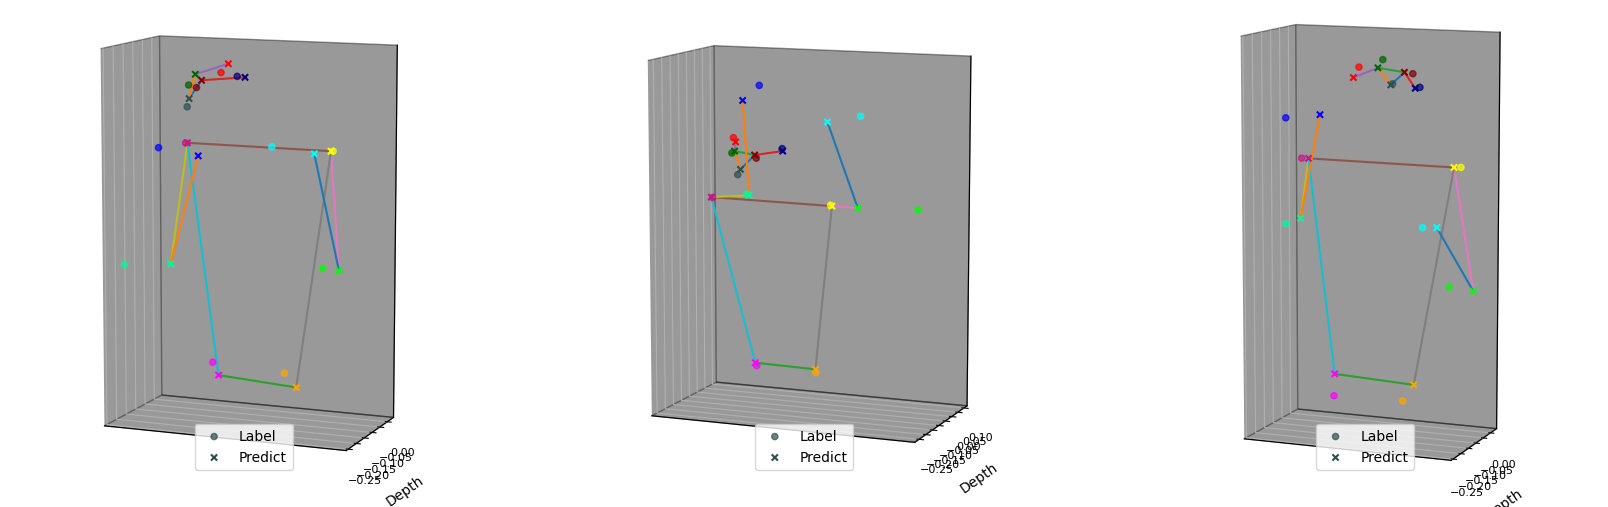

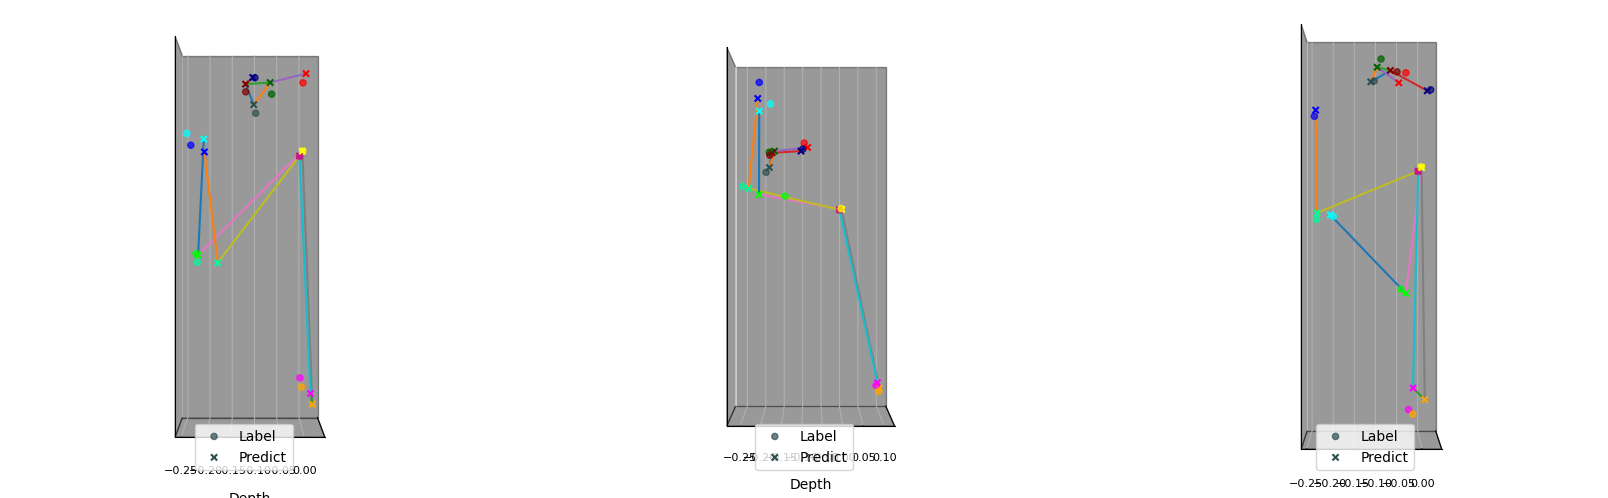

In [4]:
from modules.utils.visualization import (
    plot_samples
)
dataset_length = len(experiment.test_loader.dataset)
plot_samples(
    synthetic_cabin_ir_dataset_root_path / viewpoint,
    experiment.lit_model,
    experiment.test_loader,
    'test',
    img_figsize=(20, 10),
    plot_figsize=(20.5, 10),
    sample_indices=[
        int(dataset_length * 0.1),
        int(dataset_length * 0.5),
        int(dataset_length * 0.9),
    ],
    is_plot_gt_skeleton=False
)